# Kaggle data

In [59]:
#import review data
import csv


keys = ["RecipeID","ProfileID", "Rate"]

with open('recipe_data/clean_reviews.csv') as f:
    a = [dict(row) for row in csv.DictReader(f, skipinitialspace=True)]
print(a[0])

{'RecipeID': '7000', 'profileID': '675719', 'Rate': '5.0'}


In [60]:
#accumulate the ratings for each id
accum_avg = {}
for dic in a:
    if float(dic["RecipeID"]) in accum_avg:
        accum_avg[float(dic["RecipeID"])] += [float(dic["Rate"])]
    else:
        accum_avg[float(dic["RecipeID"])] = [float(dic["Rate"])]

In [61]:
#calcualted average
import statistics
rev_avgs = {}
for k,v in accum_avg.items():
    rev_avgs[k] = statistics.mean(v)
rev_avgs[7000]

4.621212121212121

In [62]:
len(rev_avgs.keys())

9036

In [35]:
#save reviews average json
with open('average_reviews.json', 'w') as outfile:
    json.dump(rev_avgs, outfile)

In [33]:
#load in recipes csv
import json

with open('recipe_data/clean_recipes.csv') as f1:
    reps = [json.loads(json.dumps(row)) for row in csv.DictReader(f1, skipinitialspace=True, delimiter=";")]
print(reps[0].keys())

dict_keys(['Recipe Name', 'Review Count', 'Recipe Photo', 'Author', 'Prepare Time', 'Cook Time', 'Total Time', 'Ingredients', 'Directions', 'RecipeID'])


In [77]:
len(reps)

12351

In [38]:
reps[0]['Ingredients']

'yeast,water,white sugar,salt,egg,butter,flour,butter'

# Exploratory Data

In [38]:
import statistics
import json
import ast

In [45]:
# 1 h 20 m  to num minutes
def time_conversion(input_str):
    if len(input_str)==1 or (not input_str):
        return None
    else:
        arr = input_str.split()
        if len(arr)<=2:
            return int(arr[0])
        elif len(arr) <= 4:
            return int(arr[0])*60 + int(arr[2])
        elif len(arr) <= 6:
            return int(arr[0])*60*12 + int(arr[2])*60 + int(arr[4])
    pass

In [50]:
# 1k to 1000
def num_conversion(input_str):
    if input_str.isdigit():
        return int(input_str)
    elif len(input_str)>1:
        return float(input_str[:-1])*1000
    else:
        print("hi")
        return None

In [51]:
names = []
rev_count = []
authors= []
prep_time = []
cook_time = []
total_time = []
ingredients = []
directions = []
ids = []

for dic in reps:
    names += [dic['Recipe Name']]
    revs = num_conversion(dic['Review Count'])
    if revs: rev_count += [revs]
    authors += [dic['Author']]
    prep = time_conversion(dic['Prepare Time'])
    cook = time_conversion(dic['Cook Time'])
    total = time_conversion(dic['Total Time'])
    if prep: prep_time += [prep] 
    if cook: cook_time += [cook] 
    if total: total_time += [total] 
    ingredients += [dic['Ingredients'].split(',')]  #split ingredients on "," -- should also trim all items in resulting list
    directions += [dic['Directions']]
    ids += [dic['RecipeID']]

In [53]:
#percentage of recipies with prep time
wth_prep = len(prep_time)/len(reps)
wthout_prep = 1 - wth_prep
print("With prep time: ", wth_prep, "Without prep time: ", wthout_prep)

With prep time:  0.6635090276091005 Without prep time:  0.33649097239089953


In [54]:
#percentage of recipies with cook time
wth_cook = len(cook_time)/len(reps)
wthout_cook = 1 - wth_cook
print("With cook time: ", wth_cook, "Without cook time: ", wthout_cook)

With cook time:  0.5241680835559873 Without cook time:  0.4758319164440127


In [55]:
#percentage of recipies with total time
wth_total = len(total_time)/len(reps)
wthout_total = 1 - wth_total
print("With total time: ", wth_total, "Without total time: ", wthout_total)

With total time:  0.6687717593717107 Without total time:  0.33122824062828926


In [56]:
#mean and median and sd total time, ignoring empties
#times_no_emp = [int(item) for item in times if item]
mn = statistics.mean(total_time)
mdn = statistics.median(total_time)
sd = statistics.stdev(total_time)

print("Total time (in mins): \nMean: ", mn, "\nMedian: ", mdn, "\nStd dev: ", sd)

Total time (in mins): 
Mean:  87.16246973365618 
Median:  45.0 
Std dev:  204.69913837670003


In [63]:
#percentage recipies withtout ratings
wth_r = len(rev_avgs.values())/len(reps)
wthout_r = 1 - wth_r
print("With ratings: ", wth_r, "Without ratings: ", wthout_r)

With ratings:  0.731600680106874 Without ratings:  0.26839931989312604


In [64]:
#mean median sd recipie rating

mn_r = statistics.mean(rev_avgs.values())
mdn_r = statistics.median(rev_avgs.values())
sd_r = statistics.stdev(rev_avgs.values())

print("Ratings (out of 5): \nMean: ", mn_r, "\nMedian: ", mdn_r, "\nStd dev: ", sd_r)

Ratings (out of 5): 
Mean:  4.406124892821409 
Median:  4.466666666666667 
Std dev:  0.3105658301939331


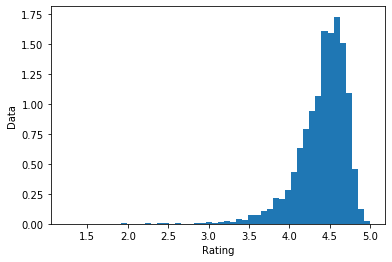

In [66]:
#graph distribution of ratings
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.hist(rev_avgs.values(), density=True, bins=50)
plt.ylabel('Data')
plt.xlabel('Rating')
plt.show()

In [71]:
#max, mean, and median num ratings
max_c = max(rev_count)
median_c = statistics.median(rev_count)
mean_c = statistics.mean(rev_count)

print("Num Ratings: \nMean: ", mean_c, "\nMedian: ", median_c, "\nMax: ", max_c)

Num Ratings: 
Mean:  122.24881979488849 
Median:  34.0 
Max:  11000.0


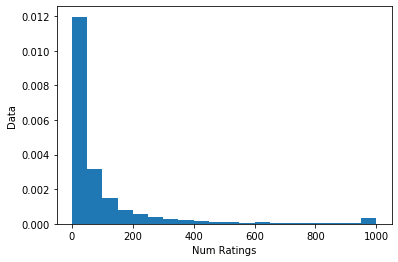

In [78]:
#graph number of ratings

plt.hist(rev_count, density=True, bins=20, range = (0,1000))
plt.ylabel('Data')
plt.xlabel('Num Ratings')
#plt.set_xlim((0, 1000))
plt.show()

In [67]:
#max num ingredients, min, mean
num_ingredients = [len(x) for x in ingredients]
max_l = max(num_ingredients)
min_l = min(num_ingredients)
mean_l = statistics.mean(num_ingredients)

print("Num Ingredeints: \nMean: ", mean_l, "\nMax: ", max_l, "\nMin: ", min_l)

Num Ingredeints: 
Mean:  8.300299570884949 
Max:  30 
Min:  1


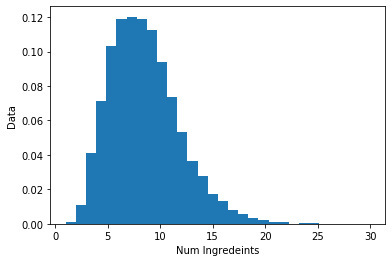

In [69]:
#graph number of ingredients

plt.hist(num_ingredients, density=True, bins=30)
plt.ylabel('Data')
plt.xlabel('Num Ingredeints')
plt.show()

# Cleaning Data and Formatting as Json

In [2]:
#load in recipes csv
import json
import csv

with open('recipe_data/clean_recipes.csv') as f1:
    reps = [json.loads(json.dumps(row)) for row in csv.DictReader(f1, skipinitialspace=True, delimiter=";")]

In [4]:
#load in review data
with open('average_reviews.json') as f1:
    reviews = json.loads(f1.read())

In [6]:
#check what data types the ids are
print(reps[1])
print(list(reviews.keys())[0])

{'Recipe Name': 'Poppy Seed Bread with Glaze Recipe ', 'Review Count': '137', 'Recipe Photo': 'https://images.media-allrecipes.com/userphotos/560x315/34726.jpg', 'Author': 'Christina Jun', 'Prepare Time': '15 m', 'Cook Time': '1 h', 'Total Time': '1 h 20 m', 'Ingredients': 'flour,salt,baking powder,poppy,butter,vegetable oil,egg,milk,white sugar,vanilla,almond,orange juice,butter,almond,vanilla,sugar', 'Directions': "'Preheat oven to 350 degrees F (175 degrees C). Grease bottoms of two 9-inch loaf pans.**Mix together flour, salt, baking powder, poppy seeds, butter flavoring, oil, eggs, milk, sugar, vanilla, and almond flavoring. Pour into prepared pans.**Bake at 350 degrees F (175 degrees C) for one hour. Cool 5 minutes. Poke holes in top of loaves and pour glaze over.**To make glaze: Mix orange juice, 1/2 teaspoon butter flavoring, 1/2 teaspoon almond flavoring, and 1 teaspoon vanilla. Add enough confectioners'' sugar to make glaze.**'", 'RecipeID': '7001'}
7000.0


In [19]:
#float(reps[0]['RecipeID']) in list(reviews.keys())
x1 = set(reviews.keys())
x1 = set(int(float(x)) for x in x1)
x2 = set([int(x['RecipeID']) for x in reps])
print(len(x1))
print(len(x2))
len(x1.intersection(x2))

9036
12351


6426

In [16]:
total_recipes = {}
print(len(reviews))
print(len(reps))
for recipe in reps:
    if str(float(recipe['RecipeID'])) in reviews: #might need to change depending on types
        #print("enter if")
        total_recipes[int(recipe['RecipeID'])] = {k:v for k,v in recipe.items() if k!='RecipeID'}
        total_recipes[int(recipe['RecipeID'])]["AvgReview"] = reviews[str(float(recipe['RecipeID']))] #again need to type check
print(len(total_recipes))

9036
12351
6426


In [21]:
with open('recipes_with_reviews.json', 'w') as f1:
    json.dump(total_recipes, f1)

# Extracting food words

In [22]:
food_words = set()

In [23]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ElizabethHealy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ElizabethHealy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [31]:
from tqdm.notebook import tqdm

In [32]:
for rep in tqdm(reps):
    title = rep['Recipe Name'].lower()
    ingred = rep['Ingredients'].lower()
    title_toks = [porter.stem(tok) for tok in word_tokenize(title) 
                  if tok.isalpha() and tok not in stopwords.words('english')]
    ingred_toks = [porter.stem(tok) for tok in word_tokenize(ingred) 
                   if tok.isalpha() and tok not in stopwords.words('english')]
    food_words.update(title_toks)
    food_words.update(ingred_toks)
print(len(food_words))
print(list(food_words)[:10])

HBox(children=(HTML(value=''), FloatProgress(value=0.0, max=12351.0), HTML(value='')))


3371
['oz', 'patatosalata', 'popper', 'gobi', 'occas', 'xviii', 'eclair', 'basil', 'smoker', 'dole']


In [24]:
reps[0]

{'Author': 'Mike A.',
 'Cook Time': '15 m',
 'Directions': 'Dissolve yeast in warm water.**Stir in sugar, salt, eggs, butter, and 2 cups of flour. Beat until smooth. Mix in remaining flour until smooth. Scrape dough from side of bowl. Knead dough, then cover it and let rise in a warm place until double (about 1 1/2 hours).**Punch down dough. Divide in half. Roll each half into a 12-inch circle. Spread with butter. Cut into 10 to 15 wedge. Roll up the wedges starting with the wide end. Place rolls with point under on a greased baking sheet. Cover and let rise until double (about 1 hour).**Bake at 400 degrees F (205 degrees C) for 12-15 minute or until golden brown. Brush tops with butter when they come out of the oven.**',
 'Ingredients': 'yeast,water,white sugar,salt,egg,butter,flour,butter',
 'Prepare Time': '25 m',
 'Recipe Name': 'Golden Crescent Rolls Recipe ',
 'Recipe Photo': 'https://images.media-allrecipes.com/userphotos/560x315/4465807.jpg',
 'RecipeID': '7000',
 'Review Count

In [33]:
'burger' in food_words

True

In [34]:
'cheese' in food_words

False

In [35]:
porter.stem('cheese')

'chees'

In [37]:
import json
with open("recipe_food_words.json", "w") as outfile: 
    json.dump(list(food_words), outfile)